In [1]:
# 7장 Support Vector machine
# 7.3.1 선형 SVM

##5장에서 사용한 iris data 사용
import seaborn as sns
iris=sns.load_dataset('iris') # iris data 불러오기
X=iris.drop('species',axis=1) # 특성변수만으로 구성된 X data Frame 생성
y=iris['species']             # 분류의 목적 변수만으로 구성된 y data Frame생성

from sklearn.preprocessing import LabelEncoder #범주형 변수 숫자로 치환하는 함수 호출
classle=LabelEncoder()
y=classle.fit_transform(iris['species'].values)#범주형 변수 숫자로 치환

from sklearn.model_selection import train_test_split #train set과 test set으로 데이터 나누기 위한 함수 호출
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

from sklearn.preprocessing import StandardScaler #data의 표준화 함수 호출.
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [3]:
#7.3 Python을 이용한 SVM
from sklearn.svm import SVC #SVM함수의 호출
svm=SVC(kernel='linear',C=1.0,random_state=1) # C: 에러허용정도
svm.fit(X_train,y_train) #SVM추정
y_train_pred=svm.predict(X_train) #train set의 y 예측치 구하기
y_test_pred=svm.predict(X_test)  #test set의 y 예측치 구하기

In [ ]:
print(svm.support_)
print(svm.n_support_)

[ 21  43 101   8  23  33  38  42  54  58  76  82  85   5  10  19  27  41
  59  60  95]
[ 3 10  8]


In [9]:
from sklearn import metrics
print(metrics.accuracy_score(y_train,y_train_pred))   # train set의 accuracy ratio
print(metrics.accuracy_score(y_test,y_test_pred))    # test set의 accuracy ratio

metrics.confusion_matrix(y_test,y_test_pred)  #confusion_matrix

from sklearn import metrics
print(metrics.classification_report(y_test,y_test_pred))   #classification_report
# metrics.classification_report(): 다양한 평가지표 한눈에

0.9904761904761905
0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.87      0.93        15
           2       0.88      1.00      0.94        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



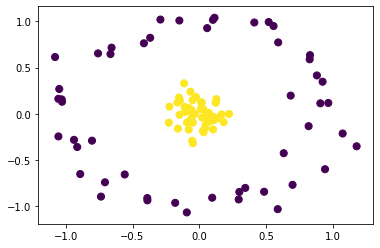

In [ ]:
###############Kernel SVM의 이해 예제###########

#평면상의 자료의 표현
%matplotlib inline    
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=100,noise=0.1,factor=0.1)
plt.scatter(X[:,0],X[:,1],c=y,s=50)

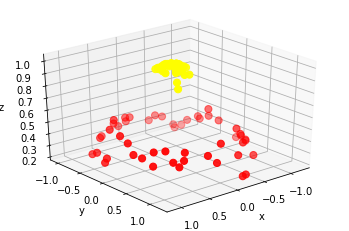

In [ ]:
#Kernel SVM의 이해 예제
#z축을 도입하여 자료를 표현
import numpy as np
r = np.exp(-(X ** 2).sum(1))
from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(azim=50, elev=30)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
interact(plot_3D, elev=[-90, 90], azip=(-180, 180),X=fixed(X), y=fixed(y));

In [6]:
##############Kernel SVM 예제##########################
# 비선형 SVM 실습#1 (분류)

from sklearn.svm import SVC # SVM 함수 호출
ksvm=SVC(kernel='rbf',C=1.0,gamma=0.2,random_state=42)
# Gamma 작을수록 두 데이터의 거리를 실제보다 멀게(overfit), 클수록 두 데이터의 거리를 
# 실제보다 가깝게 변환함(underfit)
ksvm.fit(X_train,y_train)
y_train_pred=ksvm.predict(X_train) # kernel SVM을 이용한 train set의 y 예측치 구하기
y_test_pred=ksvm.predict(X_test) # kernel SVM을 이용한 #test set의 y예측치 구하기

In [8]:
from sklearn import metrics
print(metrics.accuracy_score(y_train,y_train_pred))   # train set의 accuracy ratio
print(metrics.accuracy_score(y_test,y_test_pred))    # test set의 accuracy ratio

metrics.confusion_matrix(y_test,y_test_pred)   #confusion_matrix

0.9904761904761905
0.9555555555555556


array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  0, 15]])

In [ ]:
##########얼굴인식(Face recogniton) 예제#########
from sklearn.datasets import fetch_lfw_people  #data set 불러오기
faces=fetch_lfw_people(min_faces_per_person=70,resize=0.4)
n_samples, h, w = faces.images.sha pe
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
(1288, 50, 37)


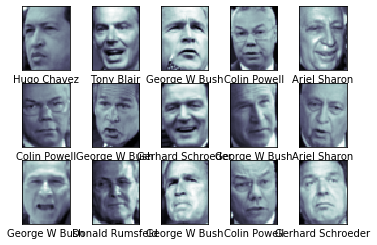

In [ ]:
import matplotlib.pyplot as plt #pyplot 함수의 호출
fig,ax=plt.subplots(3,5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [ ]:
X=faces.data
n_features=X.shape[1]
y=faces.target
target_names=faces.target_names
print(target_names)            #얼굴인식 Label 이름
n_classes=target_names.shape[0]
print(n_classes)               #Label의 종류의 총갯수

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
7


In [ ]:
# training set과 test set으로 데이터 나누기 --> 75:25의 비율
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
#주성분 분석을 이용해 150개의 특성변수에 대한 차원 축소
#Randomized PCA사용  : 8장에서 자세하게 다룸.
from sklearn.decomposition import PCA
n_components=150
pca=PCA(n_components=n_components, svd_solver='randomized',whiten=True).fit(X_train)
eigenfaces=pca.components_.reshape(n_components,h,w)
X_train_pca=pca.transform(X_train)  #주성분의 training data
X_test_pca=pca.transform(X_test)    #주성분의 test data

In [ ]:
from sklearn.svm import SVC   
from sklearn.model_selection import GridSearchCV
#커널 SVM을 이용 & 커널함수:방사형기저함수(kernel='rbf')를 사용
#방사기저함수의 최적화 gamma와 완화변수의 허용정도 c를 찾기위해 'GridSearchCV' 모듈 사용
param_grid={'C':[1e3,5e3,1e4,5e4,1e5],
            'gamma':[0.0001,0.0005,0.001,0.005,0.01,0.1]}
clf=GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=5)   
clf.fit(X_train_pca,y_train)
##  프로그램 실행시 약 1분정도 시간 소요됨.

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight='balanced',
                           coef0=0.0, decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1000.0, 5000.0, 10000.0, 50000.0, 100000.0],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(clf.best_params_)            # 추정 parameter만
print(clf.best_estimator_)         # SVC 모든 정보

{'C': 1000.0, 'gamma': 0.005}
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [ ]:
#학습된 결과를 시험데이터에 적용하여 정확도, recall, 그리고 f1을 제공하는 classification_report
y_fit=clf.predict(X_test_pca)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix        #confusion matrix를 출력
print(classification_report(y_test,y_fit,target_names=target_names))
print(confusion_matrix(y_test,y_fit,labels=range(n_classes)))

                   precision    recall  f1-score   support

     Ariel Sharon       0.75      0.46      0.57        13
     Colin Powell       0.82      0.88      0.85        60
  Donald Rumsfeld       0.90      0.67      0.77        27
    George W Bush       0.84      0.98      0.90       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       1.00      0.53      0.70        15
       Tony Blair       0.97      0.78      0.86        36

      avg / total       0.87      0.86      0.85       322

[[  6   1   0   6   0   0   0]
 [  1  53   1   5   0   0   0]
 [  1   3  18   5   0   0   0]
 [  0   3   0 143   0   0   0]
 [  0   1   0   3  20   0   1]
 [  0   3   0   3   1   8   0]
 [  0   1   1   6   0   0  28]]
